In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as snsd
import numpy as np
import geopandas as gpd
import os
import folium

A dataset listing minority languages spoken in New York City:

In [68]:
nyc_lgs = pd.read_csv('../../Data/csv/nyc_languages.csv', sep=";")
#had issues importing this dataset because of a parsing error. deleted unneccessary columns (video and audio files) but ultimately, using the sep parameter fixed it.

Source: https://www.kaggle.com/datasets/luisernestogarca/nyc-living-languages-and-distribution

In [69]:
nyc_lgs.head(5)

,language,endonym,description,world_region,country,global_speakers,primary_location,add_neighborhoods,latitude,longitude,size,status,glottocode,lg_family,iso_639_3
0,Abaza,Абаза,"The Circassian diaspora, originating from the ...",Western Asia,"Turkey, Russia",49800,Wayne (NJ),NaN,4.093.882.300,-7.420.013.000,Smallest,Residential,abaz1241,Abkhaz-Adyge,abq
1,Abruzzese,Abbruzzésə,Many immigrants from the town of Orsogna in It...,Southern Europe,Italy,NaN,Astoria,NaN,4.077.355.600,-7.392.706.500,Small,Residential,NaN,Indo-European,nap
2,Abruzzese,Abbruzzésə,Many immigrants from the town of Orsogna in It...,Southern Europe,Italy,NaN,Little Italy,NaN,4.071.870.175,-7.399.578.719,Small,Historical,NaN,Indo-European,nap
3,Acehnese,Bahsa Acèh,New York's relatively new Indonesian community...,Southeastern Asia,Indonesia,3500000,Astoria,NaN,4.075.904.600,-7.390.984.000,Smallest,Community,achi1257,Austronesian,ace
4,Acehnese,Bahsa Acèh,New York's relatively new Indonesian community...,Southeastern Asia,Indonesia,3500000,Elmhurst,NaN,4.074.409.000,-7.388.327.700,Smallest,Residential,achi1257,Austronesian,ace


In [112]:
nyc_lgs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1267 entries, 0 to 1273
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   language           1267 non-null   object 
 1   endonym            1267 non-null   object 
 2   description        1267 non-null   object 
 3   world_region       1196 non-null   object 
 4   country            1196 non-null   object 
 5   global_speakers    1048 non-null   object 
 6   primary_location   1196 non-null   object 
 7   add_neighborhoods  286 non-null    object 
 8   latitude           1196 non-null   float64
 9   longitude          1196 non-null   float64
 10  size               1196 non-null   object 
 11  status             1196 non-null   object 
 12  glottocode         1098 non-null   object 
 13  lg_family          1191 non-null   object 
 14  iso_639_3          1072 non-null   object 
dtypes: float64(2), object(13)
memory usage: 158.4+ KB


In [115]:
nyc_lgs.dtypes

language              object
endonym               object
description           object
world_region          object
country               object
global_speakers       object
primary_location      object
add_neighborhoods     object
latitude             float64
longitude            float64
size                  object
status                object
glottocode            object
lg_family             object
iso_639_3             object
dtype: object

Finding the most linguistically diverse locations in NYC (neighborhoods with highest numbers of languages spoken):

In [70]:
location_counts = nyc_lgs['primary_location'].value_counts()
print(location_counts)

primary_location
Elmhurst             49
Astoria              44
Central Harlem       38
Jackson Heights      33
Woodside             31
                     ..
Fort Lee (NJ)         1
New Rochelle (NY)     1
Tuckahoe (NY)         1
Cambria Heights       1
Howard Beach          1
Name: count, Length: 254, dtype: int64


In [71]:
top_50_locations = location_counts.head(50)


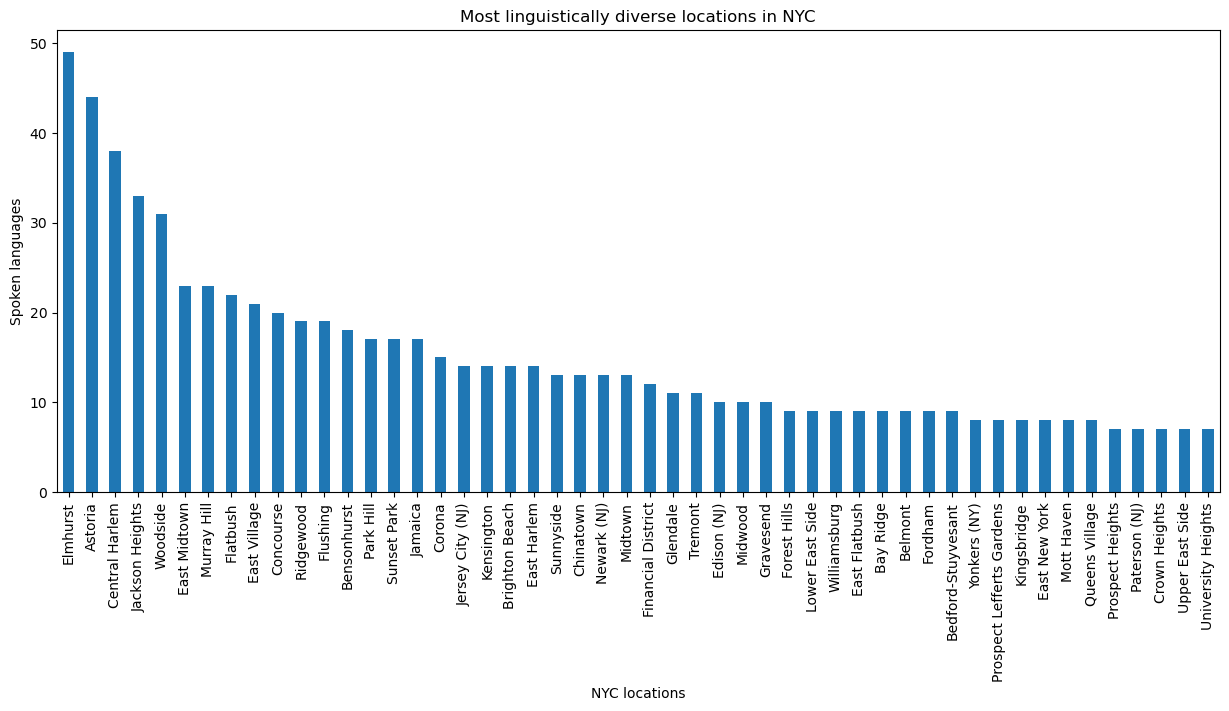

In [72]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 6))
top_50_locations.plot(kind='bar')
plt.title('Most linguistically diverse locations in NYC')
plt.xlabel('NYC locations')
plt.ylabel('Spoken languages')
plt.show()

Elmhurst has the highest number of spoken languages (almost 50). What are these languages?

In [73]:
elmhurst_data = nyc_lgs[nyc_lgs['primary_location'] == 'Elmhurst']

In [74]:
elmhurst_lgs = elmhurst_data['language'].unique() 

In [75]:
print(elmhurst_lgs)

['Acehnese' 'Bahing' 'Balinese' 'Banjarese' 'Bantawa' 'Betawi Malay'
 'Buginese' 'Burmese' 'Chantyal' 'Classical Tibetan' 'Dawei Burmese'
 'Dolpo' 'Hokkien' 'Indonesian' 'Intha Burmese' 'Isan' 'Javanese' 'Karen'
 'Kariu' 'Khaling' 'Lahu' 'Lao' 'Limbu' 'Limi' 'Madurese' 'Makassarese'
 'Malay' 'Mamuju' 'Manado Malay' 'Mandarin Chinese' 'Manggarai'
 'Minangkabau' 'Palembang' 'Northern Thai' 'Nubri' 'Rakhine' 'Sampang'
 'Sasak' 'Shan' 'Sherpa' 'Sindhi' 'Sundanese' 'Sunwar' 'Thai' 'Tibetan'
 'Tokpe Gola' 'Tontemboan' 'Vietnamese' 'Wa']


What languages are the most widespread in NYC – not by number of speakers, but by number of locations/neighborhoods they are spoken in?

In [76]:
language_counts = nyc_lgs['language'].value_counts()
top_50_languages = language_counts.head(50)

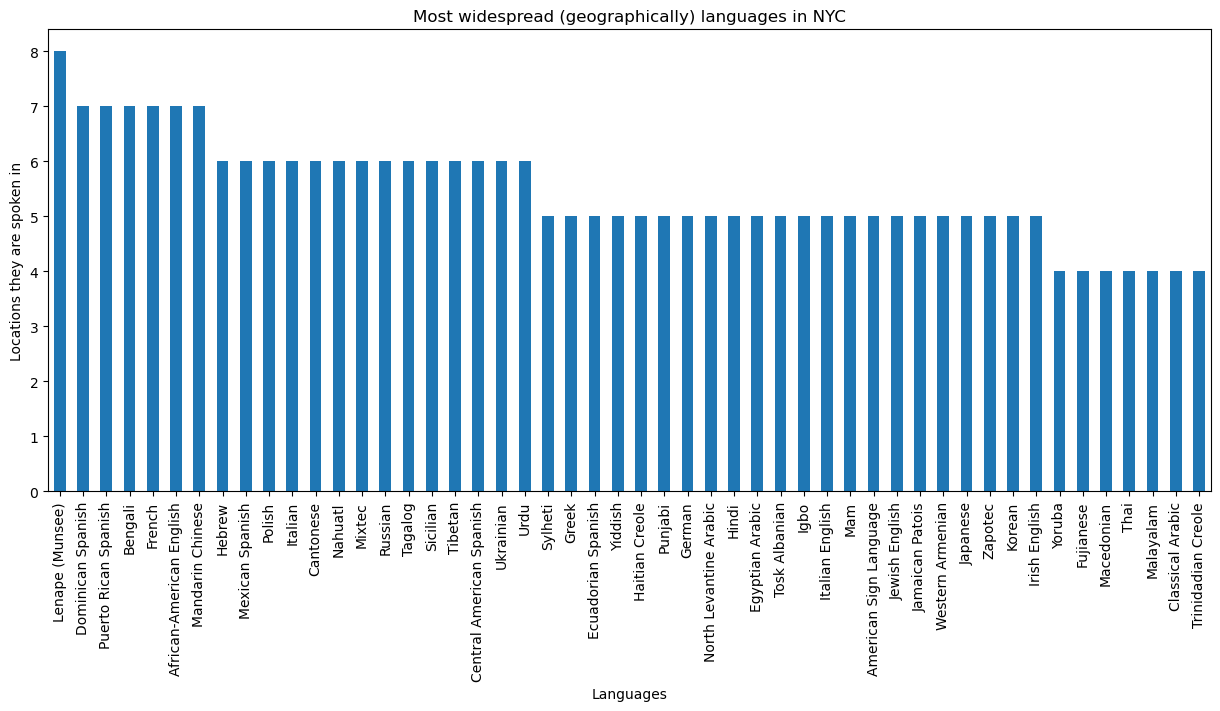

In [77]:
plt.figure(figsize=(15, 6))
top_50_languages.plot(kind='bar')
plt.title('Most widespread (geographically) languages in NYC')
plt.xlabel('Languages')
plt.ylabel('Locations they are spoken in')
plt.show()

Pie chart of world regions:

In [78]:
world_region_count = nyc_lgs['world_region'].value_counts()

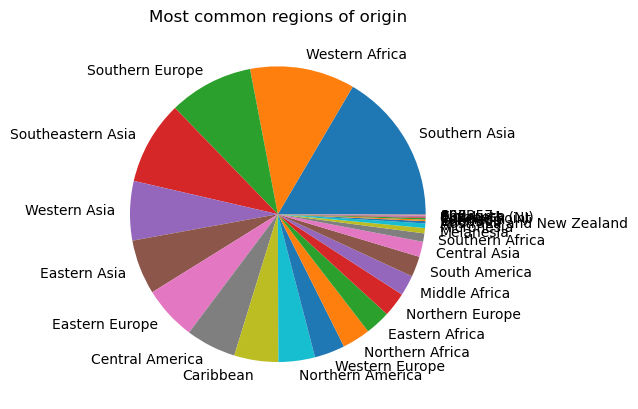

In [80]:
plt.pie(world_region_count, labels=world_region_count.index)
plt.title('Most common regions of origin')
plt.show()

Unfortunately, the labels overlap a lot. For now, I couldn't figure out how to fix this.

The most common region of origin is Southern Asia. Which of the minority languages originate there?

In [122]:
sa_data = nyc_lgs[nyc_lgs['world_region'] == 'Southern Asia']
sa_lgs = sa_data['language'].unique() 
print(sa_lgs)

['Avestan' 'Bahing' 'Balochi' 'Bantawa' 'Baragaun' 'Bengali' 'Bhojpuri'
 'Bishnupriya Manipuri' 'Bumthang' 'Burushaski' 'Chak' 'Chakma' 'Chamling'
 'Chantyal' 'Chittagonian' 'Chocha-ngacha' 'Dari' 'Dhivehi' 'Dolpo'
 'Dzongkha' 'Garo' 'Ghale' 'Gujarati' 'Gurjar' 'Gurung' 'Gyalsumdo'
 'Hazara' 'Hindi' 'Indian English' 'Iyengar Tamil'
 'Jewish Neo-Aramaic (Bijar)' 'Jewish Neo-Aramaic (Urmia)'
 'Judeo-Hamadani' 'Judeo-Isfahani' 'Judeo-Kashani' 'Judeo-Shirazi' 'Kaike'
 'Kalasha' 'Kannada' 'Kashmiri' 'Khaling' 'Kham Magar' 'Khowar' 'Konkani'
 'Kulung' 'Kurtöp' 'Limbu' 'Limi' 'Loke' 'Lotha' 'Luri' 'Magar' 'Maithili'
 'Malayalam' 'Manang' 'Marathi' 'Marma' 'Marwari' 'Mazanderani' 'Meitei'
 'Mugu' 'Munda' 'Nachhiring' 'Nar-Phu' 'Neo-Mandaic' 'Nepali' 'Newari'
 'Noakhailla' 'Nubri' 'Odia' 'Pakistani English' 'Pali' 'Pashto' 'Persian'
 'Pothwari' 'Punjabi' 'Ramaluk' 'Rangpuri' 'Sampang' 'Sandwippa'
 'Sangsari' 'Sanskrit' 'Santali' 'Saraiki' 'Seke' 'Sharchop' 'Sherpa'
 'Shina' 'Shughni' 'Denjongke

A map to show the most linguistically diverse locations:

In [81]:
from folium.plugins import HeatMap

converting the longitude and langitude columns into float type so they can be plotted on the map:

In [82]:
nyc_lgs['longitude'] = nyc_lgs['longitude'].replace('[^\d]', '', regex=True)  
nyc_lgs = nyc_lgs[nyc_lgs['longitude'] != '']
nyc_lgs['longitude'] = nyc_lgs['longitude'].astype(float)


In [83]:
nyc_lgs['longitude']

0       7.420013e+09
1       7.392706e+09
2       7.399579e+09
3       7.390984e+09
4       7.388328e+09
            ...     
1269    7.389544e+09
1270    7.389226e+09
1271    7.397438e+09
1272    7.386252e+09
1273    7.391248e+09
Name: longitude, Length: 1269, dtype: float64

In [84]:
nyc_lgs['latitude'] = nyc_lgs['latitude'].replace('[^\d]', '', regex=True)  
nyc_lgs = nyc_lgs[nyc_lgs['latitude'] != '']
nyc_lgs['latitude'] = nyc_lgs['latitude'].astype(float)

First attempt at plotting:

In [85]:
geometry = gpd.points_from_xy(nyc_lgs.longitude, nyc_lgs.latitude)

In [86]:
geo_nyc_lgs = gpd.GeoDataFrame(nyc_lgs, geometry=geometry)
geo_nyc_lgs.head()

,language,endonym,description,world_region,country,global_speakers,primary_location,add_neighborhoods,latitude,longitude,size,status,glottocode,lg_family,iso_639_3,geometry
0,Abaza,Абаза,"The Circassian diaspora, originating from the ...",Western Asia,"Turkey, Russia",49800,Wayne (NJ),NaN,4.093882e+09,7.420013e+09,Smallest,Residential,abaz1241,Abkhaz-Adyge,abq,POINT (7420013000.000 4093882300.000)
1,Abruzzese,Abbruzzésə,Many immigrants from the town of Orsogna in It...,Southern Europe,Italy,NaN,Astoria,NaN,4.077356e+09,7.392706e+09,Small,Residential,NaN,Indo-European,nap,POINT (7392706500.000 4077355600.000)
2,Abruzzese,Abbruzzésə,Many immigrants from the town of Orsogna in It...,Southern Europe,Italy,NaN,Little Italy,NaN,4.071870e+09,7.399579e+09,Small,Historical,NaN,Indo-European,nap,POINT (7399578719.000 4071870175.000)
3,Acehnese,Bahsa Acèh,New York's relatively new Indonesian community...,Southeastern Asia,Indonesia,3500000,Astoria,NaN,4.075905e+09,7.390984e+09,Smallest,Community,achi1257,Austronesian,ace,POINT (7390984000.000 4075904600.000)
4,Acehnese,Bahsa Acèh,New York's relatively new Indonesian community...,Southeastern Asia,Indonesia,3500000,Elmhurst,NaN,4.074409e+09,7.388328e+09,Smallest,Residential,achi1257,Austronesian,ace,POINT (7388327700.000 4074409000.000)


<Axes: >

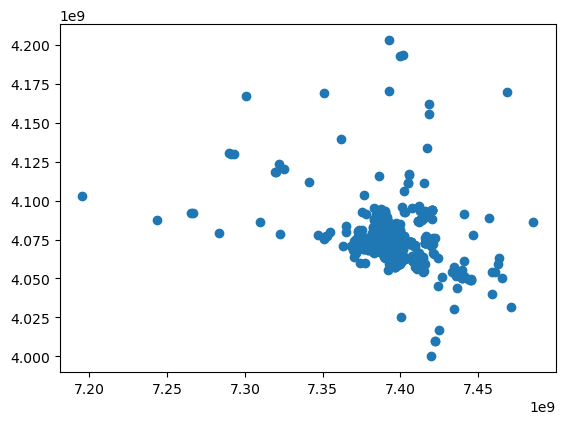

In [87]:
geo_nyc_lgs.plot()

Creating a Choropleth map to visualize the most linguistically diverse neighborhoods:

Taking geojson data from github:

In [93]:
import requests

In [94]:
nyc_geo = requests.get("https://gist.githubusercontent.com/ix4/ff7603f48283cf06fc4fb3dfb6a0635c/raw/3eae4056c9d4de99f0040b6bedbd9ba547e8d215/nyc.geojson"
                      ).json()


creating a new dataframe only including the location names and their value counts:

In [95]:
new_df = pd.DataFrame({'neighborhood': location_counts.index, 'count': location_counts.values})
print(new_df)

          neighborhood  count
0             Elmhurst     49
1              Astoria     44
2       Central Harlem     38
3      Jackson Heights     33
4             Woodside     31
..                 ...    ...
249      Fort Lee (NJ)      1
250  New Rochelle (NY)      1
251      Tuckahoe (NY)      1
252    Cambria Heights      1
253       Howard Beach      1

[254 rows x 2 columns]


The geojson data had some neighborhoods that are not present in our dataset, which resulted in greyed out areas in the map. Here I am removing those neighborhoods and finally plotting the map:

In [111]:
map = folium.Map(location=[40.7, -74], zoom_start=10.5)

folium.Choropleth(
    geo_data=nyc_geo,
    name="choropleth",
    data=new_df,
    columns=["neighborhood", "count"],
    key_on="properties.neighborhood",
    fill_color="YlGn",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="number of languages",
).add_to(map)
map


For some of the neighborhoods, there's no data in our dataset, which is why it parts of the map are greyed out. It's also worth mentioning that some of the very small neighborhoods in the dataset don't exist in the geojson data, which seems to use bigger neighborhoods. I edited the dataset by hand to include those small neighborhoods as well. This is the result: 

In [109]:
new_df_2 = pd.read_csv('../../Data/csv/new_df_nyc_2.csv', sep=";")


In [110]:
map = folium.Map(location=[40.7, -74], zoom_start=10.5)

folium.Choropleth(
    geo_data=nyc_geo,
    name="choropleth",
    data=new_df_2,
    columns=["neighborhood", "count"],
    key_on="properties.neighborhood",
    fill_color="YlGn",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="number of languages",
).add_to(map)
map

We can see that some locations now have a higher number of languages, and some new locations have appeared on the map. This – hopefully – gives a more complete picture of the minority language diversity in NYC neighborhoods.